In [19]:
%pip install -e .
%pip install adaboost


Obtaining file:///home/divyansh-rawat/ML-in-Production/project-1/notebook
ERROR: file:///home/divyansh-rawat/ML-in-Production/project-1/notebook does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement adaboost (from versions: none)
ERROR: No matching distribution found for adaboost
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
#modellling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV




In [21]:
df = pd.read_csv("data/stud.csv")

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
# dropiing the independetn feature
x = df.drop("math_score", axis=1)

In [24]:
x.head() # drooped mathematics there drppe independent feature

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [25]:
y = df["math_score"]
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [26]:
#create Column Transformer with 3 types of transformers 
num_features = x.select_dtypes(exclude=["object"]).columns
cat_features = x.select_dtypes(include=["object"]).columns


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
   [ 
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)

   ]
)

In [27]:
x = preprocessor.fit_transform(x)
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [28]:

x.shape
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [ ]:
#create an evaluation function give all metrics after model training 
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square



#importig all linear model

from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [37]:
from sklearn.linear_model import LinearRegression

models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()




    
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    # make predictions for test data
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)

    # evaluate predictions
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("="*35)
    print("model performance for test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print("="*35)
    print("\n")







Linear Regression
model performance for training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
model performance for test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Decision Tree
model performance for training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
model performance for test set
- Root Mean Squared Error: 8.0759
- Mean Absolute Error: 6.3700
- R2 Score: 0.7320


Lasso
model performance for training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
model performance for test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
model performance for training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
model performance for test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor


In [39]:
#result
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2 Score"]).sort_values(by="R2 Score", ascending=False)

,Model Name,R2 Score
3,Ridge,0.880593
0,Linear Regression,0.880433
8,Gradient Boosting Regressor,0.872041
9,Random Forest Regressor,0.851920
6,CatBoosting Regressor,0.851632
7,AdaBoost Regressor,0.849585
5,XGBRegressor,0.827797
2,Lasso,0.825320
4,KNeighborsRegressor,0.783813
1,Decision Tree,0.731978


In [40]:
#we will go with gradient boosting regressor model as it has highest r2 score

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_train, y_train)
y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)
linear_model_train_mae, linear_model_train_mse, linear_model_train_rmse, linear_model_train_r2 = evaluate_model(y_train, y_train_pred)
linear_model_test_mae, linear_model_test_mse, linear_model_test_rmse, linear_model_test_r2 = evaluate_model(y_test, y_test_pred)
print("model performance for training set")
print("- Root Mean Squared Error: {:.4f}".format(linear_model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(linear_model_train_mae))
print("- R2 Score: {:.4f}".format(linear_model_train_r2))
print("="*35)
print("model performance for test set")
print("- Root Mean Squared Error: {:.4f}".format(linear_model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(linear_model_test_mae))
print("- R2 Score: {:.4f}".format(linear_model_test_r2))

model performance for training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
model performance for test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


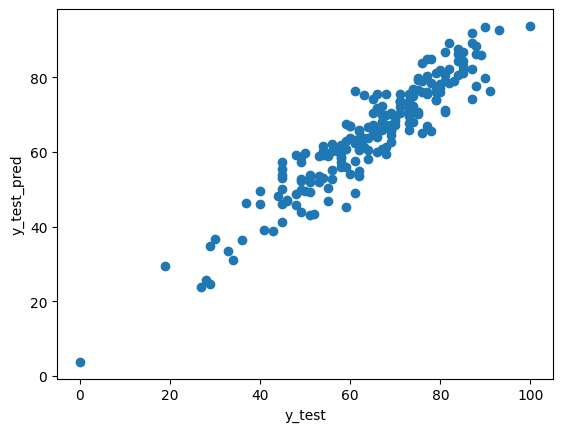

In [41]:
#plotting y_prediction and y_test
plt.scatter(y_test, y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

<Axes: xlabel='math_score'>

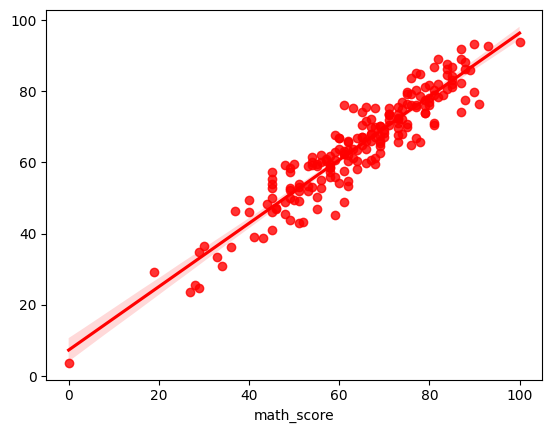

In [47]:
sns.regplot(x = y_test, y = y_test_pred,color = "red")

In [49]:
#difference btw actual and predicted value
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred})
pred_df


,Actual,Predicted
521,91,76.387970
737,53,58.885970
740,80,76.990265
660,74,76.851804
411,84,87.627378
...,...,...
408,52,43.409149
332,62,62.152214
208,74,67.888395
613,65,67.022287
